In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_csv(r'C:\Users\sreeh\DSA\Data-sets\StudentsPerformance.csv')

#### Let us explore the dataset a bit.

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
999,male,group E,bachelor's degree,standard,completed,100,100,100


In [5]:
data.shape

(1000, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1. Find out how many males and females participated in the test.

In [7]:
male_count = data[data['gender'] == 'male'].shape
female_count = data[data['gender'] =='female'].shape
print("The total number of male students is :",male_count[0])
print("The total number of female students is :",female_count[0])

The total number of male students is : 482
The total number of female students is : 518


### 2. What do you think about the students' parental level of education?

#### Let us first see the values of each education level

In [8]:
p_education_data=data['parental level of education'].value_counts(sort=False).reset_index()
p_education_data.columns = ["Education Level", "Count"]
p_education_data

,Education Level,Count
0,some high school,179
1,high school,196
2,some college,226
3,associate's degree,222
4,bachelor's degree,118
5,master's degree,59


#### Let us plot a bar graph to visualize the data.

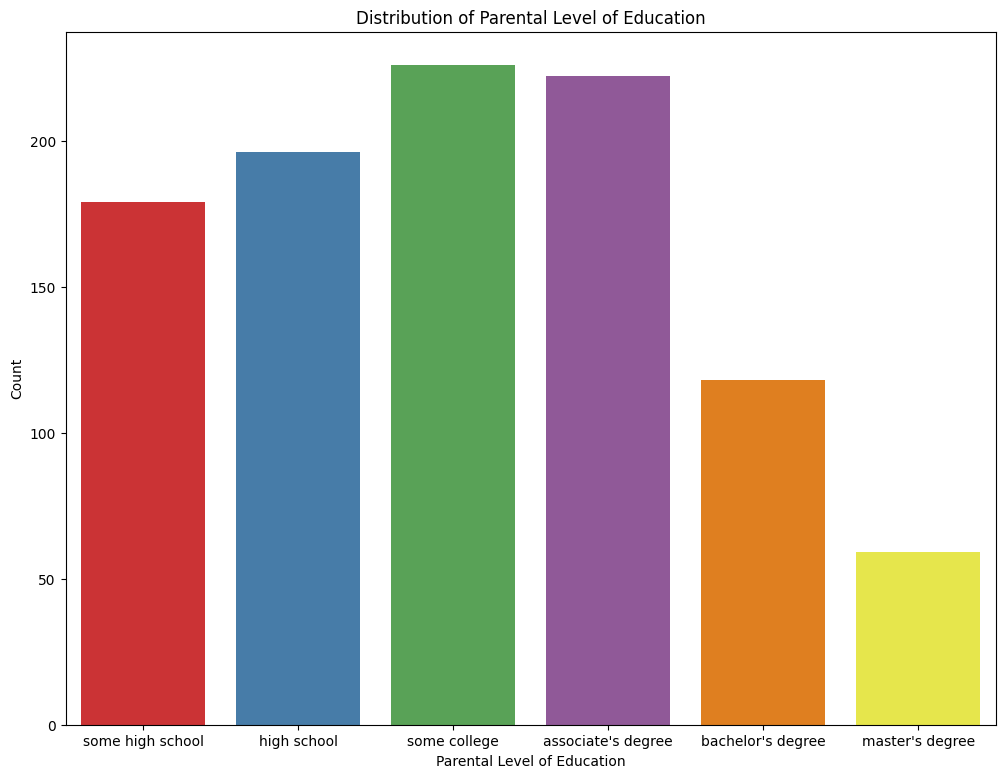

In [9]:
plt.figure(figsize=(12, 9))
sns.countplot(x="parental level of education", data=data, palette="Set1")
plt.title("Distribution of Parental Level of Education")
plt.xlabel("Parental Level of Education")
plt.ylabel("Count")
plt.show()

Now let us see how many parents have a college degree or higher.

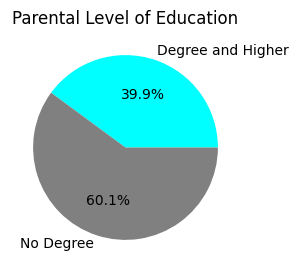

In [10]:
education_counts = data['parental level of education'].value_counts()

degree_categories = ['associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
degree_above_count = education_counts[education_counts.index.isin(degree_categories)].sum()
no_degree_count = education_counts.sum() - degree_above_count
category_counts = pd.Series([degree_above_count, no_degree_count],index=['Degree and Higher', 'No Degree'])

plt.figure(figsize=(4, 3))
colors = ['cyan', 'grey']
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Parental Level of Education')

plt.show()

From the above data we can see that there are more parents who don't have degrees than those who have a degree or higher.

### 3. Who scores the most on average for math, reading and writing based on
### ● Gender
### ● Test preparation course

In [11]:
# Let us see who score the maximum based on gender.
mean_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
mean_scores
mean_scores.style.set_properties(**{'color': 'indigo'})

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


From this table we can see that, on an average, *male* students score higher on Math while *female* students score higher on Reading and Writing.

In [12]:
# Now let us see the same based on Test Preparation course
mean_scores = data.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
mean_scores
mean_scores.style.set_properties(**{'color': 'indigo'})

,math score,reading score,writing score
test preparation course,,,
completed,69.966480,74.175978,74.684358
none,63.789720,66.417445,64.457944


From the above table we can see, on an average, students who have completed the test preparation course score higher on all fronts.

### 4. What do you think about the scoring variation for math, reading and writing based on
### ● Gender
### ● Test preparation course

#### Scoring variation for math, reading and writing based on Gender.

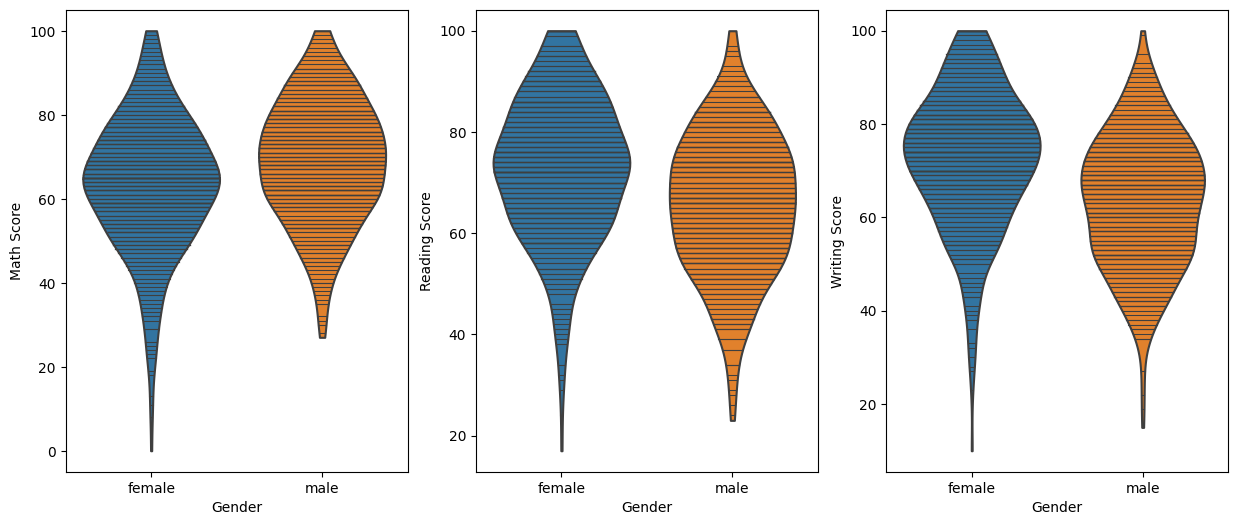

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

sns.violinplot(x='gender', y='math score', data=data, ax= axes[0], inner='stick',cut=0)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Math Score')

sns.violinplot(x='gender', y='reading score', data=data,ax= axes[1], inner='stick',cut=0)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Reading Score')

sns.violinplot(x='gender', y='writing score', data=data,ax= axes[2], inner='stick',cut=0)
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Writing Score')

plt.show()

From the above plot we can deduce the following points.

1- When it comes to match scores female students have more exteme values, while the marks of male students are more bunched together. The mean is also higher for male students which can be seen in the thickness of the violin graph.

2- In case if reading score, female students have the higher mean. They also have more number of students scoring high marks.

3- Finally when it comes to writing scores again the female students have a higher mean and the plot is top heavy. More students scored higher marks than lower. They also have many students scoring the maximum marks.

4- In all case the spread of data is higher of female students compared to male students. It is especially true in Maths.

5- We can also see that female students have more outliers in the bottom part of the graph.

In [14]:
# We can check the above inference by calculation mean and standard deviation.
gender_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']]
gender_stats = gender_scores.agg(['mean', 'std', 'min', 'max'])
gender_stats

math score                     reading score                      \
             mean        std min  max          mean        std min  max   
gender                                                                    
female  63.376448  16.029928   0  100     72.590734  14.411018  17  100   
male    68.821577  14.556411  27  100     65.545643  14.149594  23  100   

       writing score                      
                mean        std min  max  
gender                                    
female     72.467181  14.844842  10  100  
male       63.446058  14.227225  15  100

1- In math, the standard deviation of female students is higher than compared to male students. Thus the spread of data is higher for female students.  
2- In both reading score and writing score female students mean score is higher compared to male students but the spread is similar

#### Scoring Variation based on Test Preparation.

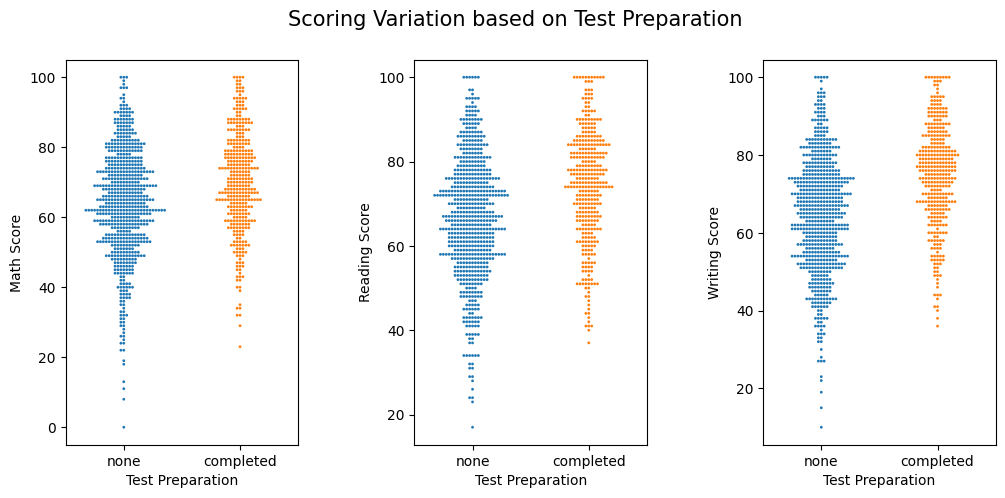

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

sns.swarmplot(x='test preparation course', y='math score',hue='test preparation course',legend = False, data=data, ax=axes[0], s=2)
axes[0].set_xlabel('Test Preparation')
axes[0].set_ylabel('Math Score')

sns.swarmplot(x='test preparation course', y='reading score',hue='test preparation course',legend = False,data=data, ax=axes[1], s=2)
axes[1].set_xlabel('Test Preparation')
axes[1].set_ylabel('Reading Score')

sns.swarmplot(x='test preparation course', y='writing score',hue='test preparation course',legend = False, data=data, ax=axes[2], s=2)
axes[2].set_xlabel('Test Preparation')
axes[2].set_ylabel('Writing Score')

fig.suptitle('Scoring Variation based on Test Preparation', fontsize=15)

plt.subplots_adjust(wspace=0.5)
plt.show()

1- From the above plot we can see that completing Test Preparation is genrally useful for scoring more marks.

2- On average the students who completed the Test Preparation Course scored more marks.  

3- The lower limit of test scores were higher for the students who completed Test Preparation.  

4- They also scored more maximum scores.  

5- The students who completed the Test Preparation Course have a lesser spread of data compared with students who did not.

In [16]:
# Checking the above inference.
prep_scores = data.groupby('test preparation course')[['math score', 'reading score', 'writing score']]
prep_stats = prep_scores.agg(['mean', 'std', 'min', 'max'])
prep_stats

math score                     reading score  \
                              mean        std min  max          mean   
test preparation course                                                
completed                 69.96648  14.521847  23  100     74.175978   
none                      63.78972  15.705689   0  100     66.417445   

                                            writing score                      
                               std min  max          mean        std min  max  
test preparation course                                                        
completed                13.537572  37  100     74.684358  13.236412  36  100  
none                     14.608896  17  100     64.457944  15.041667  10  100

1- Again, with higher mean, student with test perparation course have scored better compared to those who had not completed it.  
2- They have also higher minimum score.  
3- The standard deviation indicates that students who have test preparation course completed have less variation in score.

### 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [17]:
sorted_df = data.sort_values('math score', ascending=False)
index_75th_percentile = sorted_df['math score'].quantile(0.75)

# As we have seen from the above plots and tabular data, there are multiple students with 100 marks in math score.
# Thus there is no student with 100 percentile and the top 25% will be from 75th percentile to 99th percentile.
top_25_percent_students = sorted_df[sorted_df['math score'] >= index_75th_percentile]

# Assign bonus points to the selected students
top_25_percent_students.loc[:,'bonus points'] = 10
top_25_percent_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus points
999,male,group E,bachelor's degree,standard,completed,100,100,100,10
996,male,group A,some college,standard,completed,100,96,86,10
515,female,group E,some college,standard,none,100,92,97,10
517,female,group E,associate's degree,standard,none,100,100,100,10
516,female,group E,bachelor's degree,standard,none,100,100,100,10
...,...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62,10
849,male,group A,bachelor's degree,standard,none,77,67,68,10
850,male,group C,associate's degree,free/reduced,none,77,67,64,10
421,female,group C,some college,free/reduced,none,77,90,91,10


Here, there are more than 250 values because there are multiple number of minimum and maximum values.